In [70]:
import trident
import numpy as np
import yt
import MISTY
import sys
import os

import matplotlib as mpl
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
mpl.rcParams['font.family'] = 'stixgeneral'
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import AxesGrid

from astropy.table import Table
from astropy.io import fits

from get_refine_box import get_refine_box
from get_proper_box_size import get_proper_box_size
from consistency import *

%matplotlib notebook

import pickle
import datashader as dshader
import datashader.transfer_functions as tf
from datashader import reductions
from datashader.utils import export_image
import pandas as pd


In [65]:
forced_ds = yt.load("/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/RD0020/RD0020")
track_name = "/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track"
output_dir = "/Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/comparisons/"
natural_ds = yt.load("/Users/molly/foggie/halo_008508/nref11n/natural/RD0020/RD0020")
## output_dir = "/Users/molly/Dropbox/foggie-collab/plots/halo_008508/natural/nref11/spectra/"
os.chdir(output_dir)
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = forced_ds.get_parameter('CosmologyCurrentRedshift')

proper_box_size = get_proper_box_size(forced_ds)
forced_box, forced_c, width = get_refine_box(forced_ds, zsnap, track)
natural_box, natural_c, width = get_refine_box(natural_ds, zsnap, track)
width = width * proper_box_size

# forced_box = forced_ds.box([xmin, ymin, zmin], [xmax, ymax, zmax])
# forced_c = forced_ds.arr(halo_center,'code_length')
# natural_box = natural_ds.box([xmin, ymin, zmin], [xmax, ymax, zmax])
# natural_c = natural_ds.arr(halo_center,'code_length')
# width = (197./forced_ds.hubble_constant)/(1+forced_ds.current_redshift)
print("width = ", width, "kpc")

res = [1000,1000]

trident.add_ion_fields(forced_ds, ions=['O VI'])
trident.add_ion_fields(natural_ds, ions=['O VI'])
# trident.add_ion_fields(forced_ds, ions=['C II'])
# trident.add_ion_fields(natural_ds, ions=['C II'])
trident.add_ion_fields(forced_ds, ions=['Si II'])
trident.add_ion_fields(natural_ds, ions=['Si II'])
trident.add_ion_fields(forced_ds, ions=['Si IV'])
trident.add_ion_fields(natural_ds, ions=['Si IV'])


yt : [INFO     ] 2018-09-21 07:20:34,536 Parameters: current_time              = 154.80103271743
yt : [INFO     ] 2018-09-21 07:20:34,538 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-09-21 07:20:34,539 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-09-21 07:20:34,540 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-09-21 07:20:34,546 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-09-21 07:20:34,547 Parameters: current_redshift          = 1.9999996879495
yt : [INFO     ] 2018-09-21 07:20:34,547 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-09-21 07:20:34,548 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-09-21 07:20:34,548 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2018-09-21 07:20:34,589 Parameters: current_time              = 154.80118773327
yt : [INFO     ] 2018-09-21 07:20:34,590 Parameters: domain_dimensions         = [256 

width =  95.92327136852232 kpc



yt : [INFO     ] 2018-09-21 07:20:35,763 Gathering a field list (this may take a moment.)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/units/yt_array.py:978: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ret = super(YTArray, self).__getitem__(item)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/fields/fluid_fields.py:201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_field[slice_3d] = f
Parsing Hierarchy : 100%|██████████| 1449/1449 [00:00<00:00, 30373.00it/s]
yt : [INFO     ] 2018-09-2

In [ ]:


ion = 'Si_p1_number_density'

si2colr = []
for axis in ('x','y','z'):
    dph_forced = yt.ProjectionPlot(forced_ds,axis,('gas',ion), center=forced_c, \
                            width=(width,"kpc"), data_source=forced_box)
    frb = dph_forced.frb['gas',ion]
    si2_forced = np.array(np.log10(frb))
    si2colr.append(si2_forced.ravel())
si2colr_new = np.concatenate((si2colr[0], si2colr[1], si2colr[2]), axis=None)

si2coln = []
for axis in ('x','y','z'):
    dph_natural = yt.ProjectionPlot(natural_ds,axis,('gas',ion), center=natural_c, \
                            width=(width,"kpc"), data_source=natural_box)
    frb = dph_natural.frb['gas',ion]
    si2_natural = np.array(np.log10(frb))
    si2coln.append(si2_natural.ravel())
si2coln_new = np.concatenate((si2coln[0], si2coln[1], si2coln[2]), axis=None)


In [5]:
ion = 'H_p0_number_density'
hicolr = []
for axis in ('x','y','z'):
    dph_forced = yt.ProjectionPlot(forced_ds,axis,('gas',ion), center=forced_c, \
                            width=(width,"kpc"), data_source=forced_box)
    frb = dph_forced.frb['gas',ion]
    hi_forced = np.array(np.log10(frb))
    hicolr.append(hi_forced.ravel())


yt : [INFO     ] 2018-08-20 11:29:54,374 Projection completed
yt : [INFO     ] 2018-08-20 11:29:54,375 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-08-20 11:29:54,375 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-08-20 11:29:54,377 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-08-20 11:29:54,377 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-08-20 11:29:54,379 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800
yt : [INFO     ] 2018-08-20 11:30:04,946 Projection completed
yt : [INFO     ] 2018-08-20 11:30:04,947 xlim = 0.501099 0.503099
yt : [INFO     ] 2018-08-20 11:30:04,948 ylim = 0.493091 0.495091
yt : [INFO     ] 2018-08-20 11:30:04,949 xlim = 0.501099 0.503099
yt : [INFO     ] 2018-08-20 11:30:04,950 ylim = 0.493091 0.495091
yt : [INFO     ] 2018-08-20 11:30:04,951 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800
yt : [INFO     ] 2018-08-20 11:30:15,129 Projection completed
yt : [INFO     ] 2018-08-20 11:30:15,130 xli

In [15]:
hicolr_good = np.concatenate((hicolr[0], hicolr[1], hicolr[2]), axis=None)


array([ 14.34119884,  14.34510116,  14.34704642, ...,  13.94768723,
        13.94154845,  13.83901656])

In [16]:
hicoln = []
for axis in ('x','y','z'):
    dph_natural = yt.ProjectionPlot(natural_ds,axis,('gas',ion), center=natural_c, \
                            width=(width,"kpc"), data_source=natural_box)
    frb = dph_natural.frb['gas',ion]
    hi_natural = np.array(np.log10(frb))
    hicoln.append(hi_natural.ravel())
hicoln_good = np.concatenate((hicoln[0], hicoln[1], hicoln[2]), axis=None)


yt : [INFO     ] 2018-08-20 11:35:58,188 Projection completed
yt : [INFO     ] 2018-08-20 11:35:58,189 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-08-20 11:35:58,190 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-08-20 11:35:58,191 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-08-20 11:35:58,192 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-08-20 11:35:58,193 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800
/Users/molly/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
yt : [INFO     ] 2018-08-20 11:35:58,520 Projection completed
yt : [INFO     ] 2018-08-20 11:35:58,521 xlim = 0.501099 0.503099
yt : [INFO     ] 2018-08-20 11:35:58,521 ylim = 0.493091 0.495091
yt : [INFO     ] 2018-08-20 11:35:58,523 xlim = 0.501099 0.503099
yt : [INFO     ] 2018-08-20 11:35:58,523 ylim = 0.493091 0.495091
yt : [INFO     ] 2018-08-20 11:35:58,525 Making a fixed resolution buffer of (('gas

In [36]:
forced_ds = yt.load("/astro/simulations/FOGGIE/halo_008508/nref11n/nref11n_nref10f_refine200kpc/RD0018/RD0018")
track_name = "/astro/simulations/FOGGIE/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track"
output_dir = "/Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/comparisons/"
natural_ds = yt.load("/astro/simulations/FOGGIE/halo_008508/nref11n/natural/RD0018/RD0018")
## output_dir = "/Users/molly/Dropbox/foggie-collab/plots/halo_008508/natural/nref11/spectra/"
os.chdir(output_dir)
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = forced_ds.get_parameter('CosmologyCurrentRedshift')

proper_box_size = get_proper_box_size(forced_ds)
forced_box, forced_c, width = get_refine_box(forced_ds, zsnap, track)
natural_box, natural_c, width = get_refine_box(natural_ds, zsnap, track)
width = width * proper_box_size

# forced_box = forced_ds.box([xmin, ymin, zmin], [xmax, ymax, zmax])
# forced_c = forced_ds.arr(halo_center,'code_length')
# natural_box = natural_ds.box([xmin, ymin, zmin], [xmax, ymax, zmax])
# natural_c = natural_ds.arr(halo_center,'code_length')
# width = (197./forced_ds.hubble_constant)/(1+forced_ds.current_redshift)
print "width = ", width, "kpc"

res = [1000,1000]

trident.add_ion_fields(forced_ds, ions=['O VI'])
trident.add_ion_fields(natural_ds, ions=['O VI'])
# trident.add_ion_fields(forced_ds, ions=['C II'])
# trident.add_ion_fields(natural_ds, ions=['C II'])
trident.add_ion_fields(forced_ds, ions=['Si II'])
trident.add_ion_fields(natural_ds, ions=['Si II'])

## start with HI



yt : [INFO     ] 2018-08-20 13:47:30,827 Parameters: current_time              = 123.513344309
yt : [INFO     ] 2018-08-20 13:47:30,827 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-08-20 13:47:30,829 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-08-20 13:47:30,830 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-08-20 13:47:30,831 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-08-20 13:47:30,831 Parameters: current_redshift          = 2.49999962106
yt : [INFO     ] 2018-08-20 13:47:30,832 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-08-20 13:47:30,833 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-08-20 13:47:30,833 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2018-08-20 13:47:30,877 Parameters: current_time              = 123.513344305
yt : [INFO     ] 2018-08-20 13:47:30,877 Parameters: domain_dimensions         = [256 

width =  82.2199472369 kpc


Parsing Hierarchy : 100%|██████████| 4359/4359 [00:00<00:00, 34174.80it/s]
yt : [INFO     ] 2018-08-20 13:47:31,270 Gathering a field list (this may take a moment.)
Parsing Hierarchy : 100%|██████████| 1176/1176 [00:00<00:00, 4058.04it/s]
yt : [INFO     ] 2018-08-20 13:47:34,833 Gathering a field list (this may take a moment.)


In [ ]:
ion = 'H_p0_number_density'

hicolr = []
for axis in ('x','y','z'):
    dph_forced = yt.ProjectionPlot(forced_ds,axis,('gas',ion), center=forced_c, \
                            width=(width,"kpc"), data_source=forced_box)
    frb = dph_forced.frb['gas',ion]
    hi_forced = np.array(np.log10(frb))
    hicolr.append(hi_forced.ravel())
hicolr_new = np.concatenate((hicolr[0], hicolr[1], hicolr[2]), axis=None)

hicoln = []
for axis in ('x','y','z'):
    dph_natural = yt.ProjectionPlot(natural_ds,axis,('gas',ion), center=natural_c, \
                            width=(width,"kpc"), data_source=natural_box)
    frb = dph_natural.frb['gas',ion]
    hi_natural = np.array(np.log10(frb))
    hicoln.append(hi_natural.ravel())
hicoln_new = np.concatenate((hicoln[0], hicoln[1], hicoln[2]), axis=None)




In [43]:
ion = 'Si_p1_number_density'

si2colr = []
for axis in ('x','y','z'):
    dph_forced = yt.ProjectionPlot(forced_ds,axis,('gas',ion), center=forced_c, \
                            width=(width,"kpc"), data_source=forced_box)
    frb = dph_forced.frb['gas',ion]
    si2_forced = np.array(np.log10(frb))
    si2colr.append(si2_forced.ravel())
si2colr_good = np.concatenate((si2colr[0], si2colr[1], si2colr[2]), axis=None)

si2coln = []
for axis in ('x','y','z'):
    dph_natural = yt.ProjectionPlot(natural_ds,axis,('gas',ion), center=natural_c, \
                            width=(width,"kpc"), data_source=natural_box)
    frb = dph_natural.frb['gas',ion]
    si2_natural = np.array(np.log10(frb))
    si2coln.append(si2_natural.ravel())
si2coln_good = np.concatenate((si2coln[0], si2coln[1], si2coln[2]), axis=None)


yt : [INFO     ] 2018-08-20 14:58:00,146 Projection completed
yt : [INFO     ] 2018-08-20 14:58:00,147 xlim = 0.489870 0.491870
yt : [INFO     ] 2018-08-20 14:58:00,148 ylim = 0.500437 0.502437
yt : [INFO     ] 2018-08-20 14:58:00,149 xlim = 0.489870 0.491870
yt : [INFO     ] 2018-08-20 14:58:00,150 ylim = 0.500437 0.502437
yt : [INFO     ] 2018-08-20 14:58:00,151 Making a fixed resolution buffer of (('gas', 'Si_p1_number_density')) 800 by 800
/Users/molly/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
yt : [INFO     ] 2018-08-20 15:03:31,252 Projection completed
yt : [INFO     ] 2018-08-20 15:03:31,253 xlim = 0.500437 0.502437
yt : [INFO     ] 2018-08-20 15:03:31,254 ylim = 0.493657 0.495657
yt : [INFO     ] 2018-08-20 15:03:31,255 xlim = 0.500437 0.502437
yt : [INFO     ] 2018-08-20 15:03:31,256 ylim = 0.493657 0.495657
yt : [INFO     ] 2018-08-20 15:03:31,257 Making a fixed resolution buffer of (('ga

In [45]:
ion = 'Si_p3_number_density'
trident.add_ion_fields(forced_ds, ions=['Si IV'])
trident.add_ion_fields(natural_ds, ions=['Si IV'])

si4colr = []
for axis in ('x','y','z'):
    dph_forced = yt.ProjectionPlot(forced_ds,axis,('gas',ion), center=forced_c, \
                            width=(width,"kpc"), data_source=forced_box)
    frb = dph_forced.frb['gas',ion]
    si4_forced = np.array(np.log10(frb))
    si4colr.append(si2_forced.ravel())
si4colr_good = np.concatenate((si4colr[0], si4colr[1], si4colr[2]), axis=None)

si4coln = []
for axis in ('x','y','z'):
    dph_natural = yt.ProjectionPlot(natural_ds,axis,('gas',ion), center=natural_c, \
                            width=(width,"kpc"), data_source=natural_box)
    frb = dph_natural.frb['gas',ion]
    si4_natural = np.array(np.log10(frb))
    si4coln.append(si4_natural.ravel())
si4coln_good = np.concatenate((si4coln[0], si4coln[1], si4coln[2]), axis=None)


yt : [WARNING  ] 2018-08-20 15:17:02,945 Field ('gas', 'Si_p3_ion_fraction') already exists. To override use force_override=True.
yt : [WARNING  ] 2018-08-20 15:17:02,955 Field ('gas', 'Si_p3_number_density') already exists. To override use force_override=True.
yt : [WARNING  ] 2018-08-20 15:17:02,961 Field ('gas', 'Si_p3_density') already exists. To override use force_override=True.
yt : [WARNING  ] 2018-08-20 15:17:02,967 Field ('gas', 'Si_p3_mass') already exists. To override use force_override=True.
yt : [WARNING  ] 2018-08-20 15:17:02,972 Field ('gas', 'Si_p3_ion_fraction') already exists. To override use force_override=True.
yt : [WARNING  ] 2018-08-20 15:17:02,977 Field ('gas', 'Si_p3_number_density') already exists. To override use force_override=True.
yt : [WARNING  ] 2018-08-20 15:17:02,982 Field ('gas', 'Si_p3_density') already exists. To override use force_override=True.
yt : [WARNING  ] 2018-08-20 15:17:02,988 Field ('gas', 'Si_p3_mass') already exists. To override use for

In [38]:
hicolr_tot = np.concatenate((hicolr_good, hicolr_new), axis=None)
hicoln_tot = np.concatenate((hicoln_good, hicoln_new), axis=None)
si2colr_tot = np.concatenate((si2colr_good, si2colr_new), axis=None)
si2coln_tot = np.concatenate((si2coln_good, si2coln_new), axis=None)
si4colr_tot = np.concatenate((si4colr_good, si4colr_new), axis=None)
si4coln_tot = np.concatenate((si4coln_good, si4coln_new), axis=None)

<IPython.core.display.Javascript object>


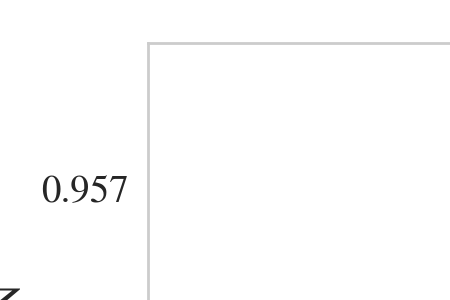

In [31]:
fig, ax = plt.subplots(figsize=(9,6))
ax.hist(hicolr_tot,bins=6000,histtype='step',range=[12,24],normed=True,cumulative=-1,label="refined",lw=2)
ax.hist(hicoln_tot,bins=6000,histtype='step',range=[12,24],normed=True,cumulative=-1,label="standard",lw=2)
plt.xlim(15,20)
plt.ylim(0,0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = 'upper right', fontsize=16)
plt.xlabel('log HI column density',fontsize=16)
plt.ylabel('fraction of sightlines with > N',fontsize=16)
plt.tight_layout()
plt.savefig(output_dir + 'HI_covering_fractions_strong.png')


<IPython.core.display.Javascript object>


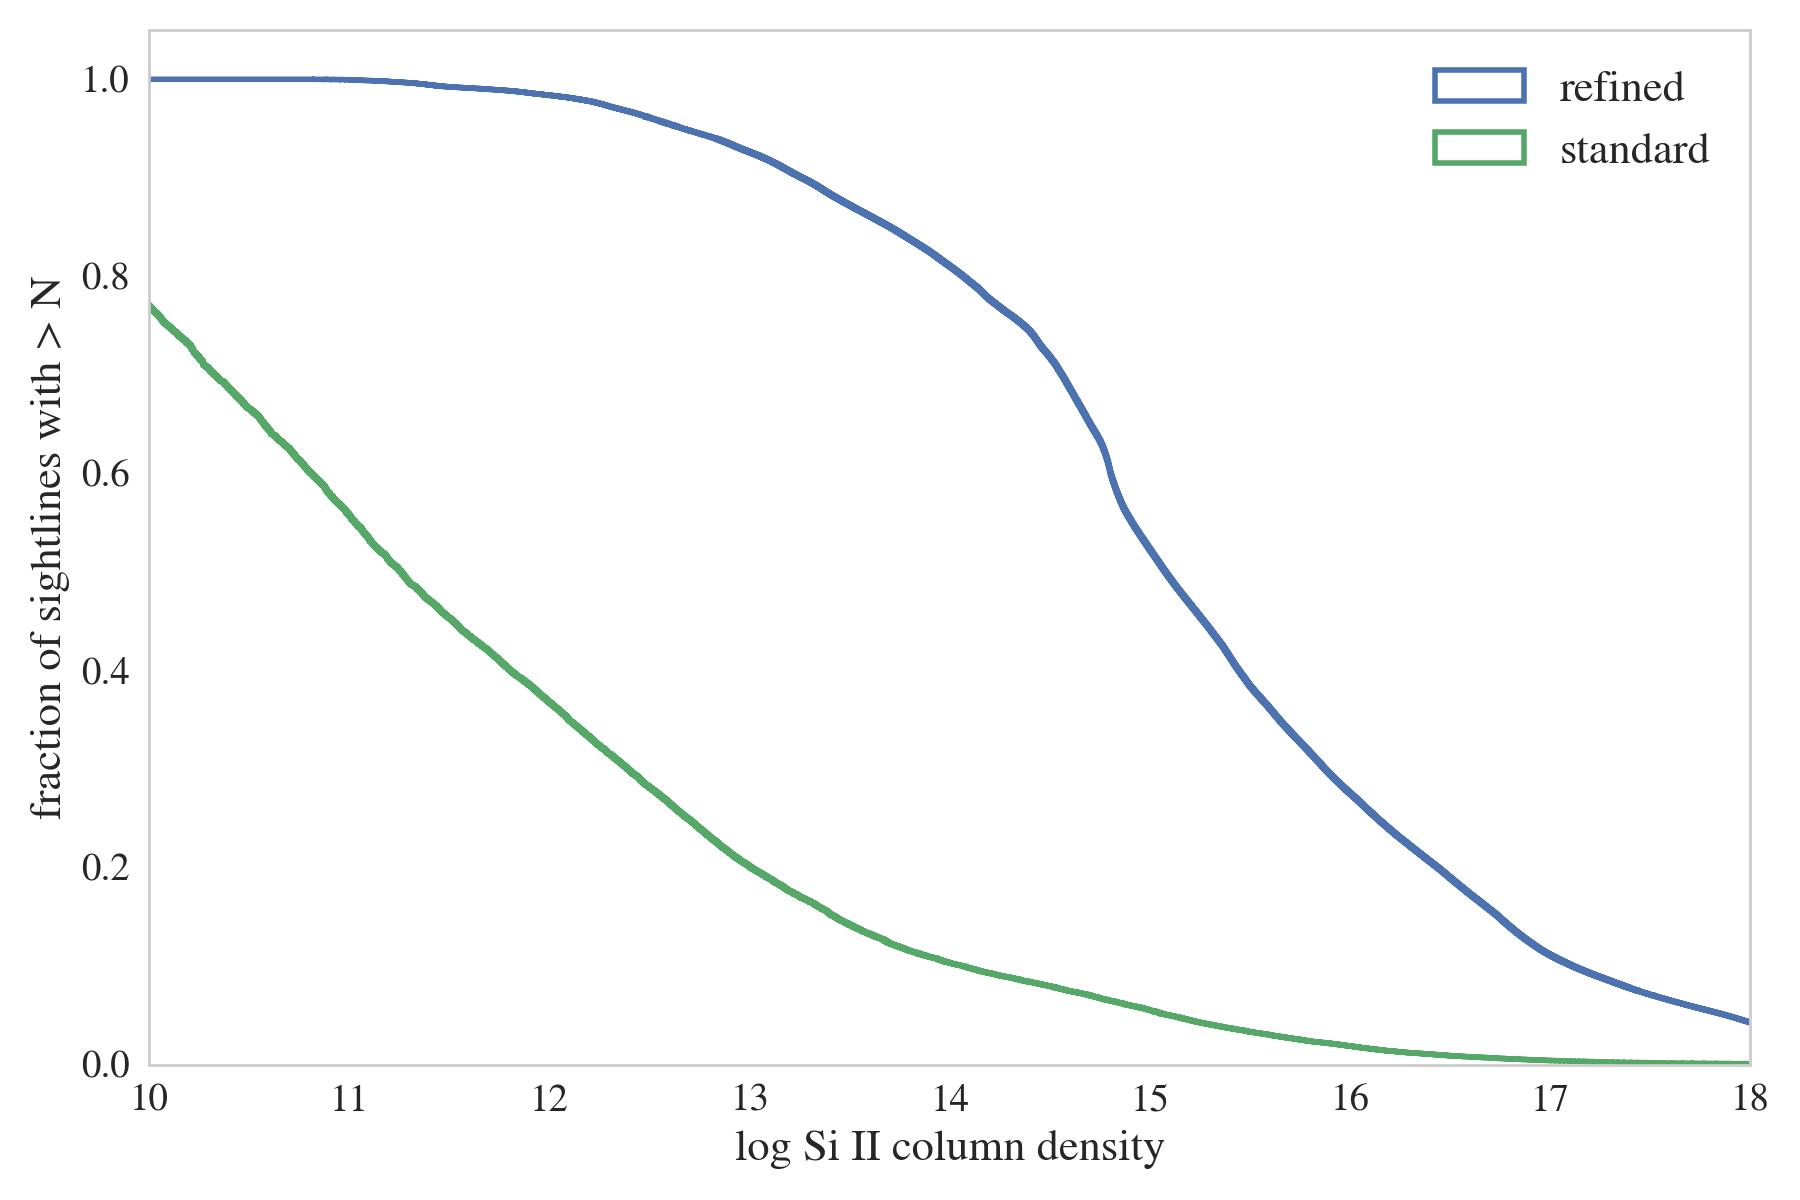

In [42]:
fig, ax = plt.subplots(figsize=(9,6))
ax.hist(si2colr_tot,bins=6000,histtype='step',range=[9,19],normed=True,cumulative=-1,label="refined",lw=2)
ax.hist(si2coln_tot,bins=6000,histtype='step',range=[9,19],normed=True,cumulative=-1,label="standard",lw=2)
plt.xlim(10,18)
plt.ylim(0,1.05)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = 'upper right', fontsize=16)
plt.xlabel('log Si II column density',fontsize=16)
plt.ylabel('fraction of sightlines with > N',fontsize=16)
plt.tight_layout()
plt.savefig(output_dir + 'SiII_covering_fractions.png')


In [32]:
plt.xlim(12.5,19)
plt.ylim(0,1)
plt.tight_layout()
plt.savefig(output_dir + 'HI_covering_fractions.png')



In [4]:
pkl_dir = '/Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/comparisons/'
## screw it, let's brute force this
ion = 'H_p0_number_density'
print("trying ",ion)
pkl_name = pkl_dir + ion + '_nref10f_RD0020_column_densities.pkl'
print("opening ", pkl_name)
poop = pickle.load(open( pkl_name, "rb" ) )
pkl_name = pkl_dir + ion + '_nref10f_RD0018_column_densities.pkl'
print("opening ", pkl_name)
fart = pickle.load(open( pkl_name, "rb" ) )
hi_colr = np.append(poop,fart,axis=None)

ion = 'Si_p1_number_density'
print("trying ",ion)
pkl_name = pkl_dir + ion + '_nref10f_RD0020_column_densities.pkl'
print("opening ", pkl_name)
poop = pickle.load(open( pkl_name, "rb" ) )
pkl_name = pkl_dir + ion + '_nref10f_RD0018_column_densities.pkl'
print("opening ", pkl_name)
fart = pickle.load(open( pkl_name, "rb" ) )
si2_colr = np.append(poop,fart,axis=None)
pkl_name = pkl_dir + ion + '_natural_RD0020_column_densities.pkl'
print("opening ", pkl_name)
poop = pickle.load(open( pkl_name, "rb" ) )
pkl_name = pkl_dir + ion + '_natural_RD0018_column_densities.pkl'
print("opening ", pkl_name)
fart = pickle.load(open( pkl_name, "rb" ) )
si2_coln = np.append(poop,fart,axis=None)
si2_colr[si2_colr == -np.inf] = 1
si2_coln[si2_coln == -np.inf] = 1


trying  H_p0_number_density
opening  /Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/comparisons/H_p0_number_density_nref10f_RD0020_column_densities.pkl
opening  /Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/comparisons/H_p0_number_density_nref10f_RD0018_column_densities.pkl
trying  Si_p1_number_density
opening  /Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/comparisons/Si_p1_number_density_nref10f_RD0020_column_densities.pkl
opening  /Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/comparisons/Si_p1_number_density_nref10f_RD0018_column_densities.pkl
opening  /Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/comparisons/Si_p1_number_density_natural_RD0020_column_densities.pkl
opening  /Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/comparisons/Si_p1_number_density_natural_RD0018_column_densities.pkl


In [13]:
ion = 'H_p0_number_density'
hicolr = []
for axis in ('x'):
    dph_forced = yt.ProjectionPlot(forced_ds,axis,('gas',ion), center=forced_c, \
                            width=(width,"kpc"), data_source=forced_box)
    frb = dph_forced.frb['gas',ion]
    hi_forced = np.array(np.log10(frb))

ion = 'Si_p1_number_density'
si2colr = []
for axis in ('x'):
    dph_forced = yt.ProjectionPlot(forced_ds,axis,('gas',ion), center=forced_c, \
                            width=(width,"kpc"), data_source=forced_box)
    frb = dph_forced.frb['gas',ion]
    si2_forced = np.array(np.log10(frb))
si2_forced[si2_forced == -np.inf] = 1


yt : [INFO     ] 2018-09-20 16:42:47,634 Projection completed
yt : [INFO     ] 2018-09-20 16:42:47,635 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-09-20 16:42:47,636 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-09-20 16:42:47,637 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-09-20 16:42:47,638 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-09-20 16:42:47,639 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800
yt : [INFO     ] 2018-09-20 16:44:20,145 Projection completed
yt : [INFO     ] 2018-09-20 16:44:20,146 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-09-20 16:44:20,146 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-09-20 16:44:20,148 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-09-20 16:44:20,149 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-09-20 16:44:20,150 Making a fixed resolution buffer of (('gas', 'Si_p1_number_density')) 800 by 800


In [108]:
radii = np.zeros(resolution)
indices = np.indices(resolution)
for x in range(0, 1048):
    for y in range(0, 1048):
        radii[x,y] = np.sqrt((524-x)**2 + (524-y)**2)


In [130]:
#np.max((frb[ion]))
np.max(dph_natural.frb['gas',ion])

2.059244161493086e+19 cm**(-2)

<IPython.core.display.Javascript object>


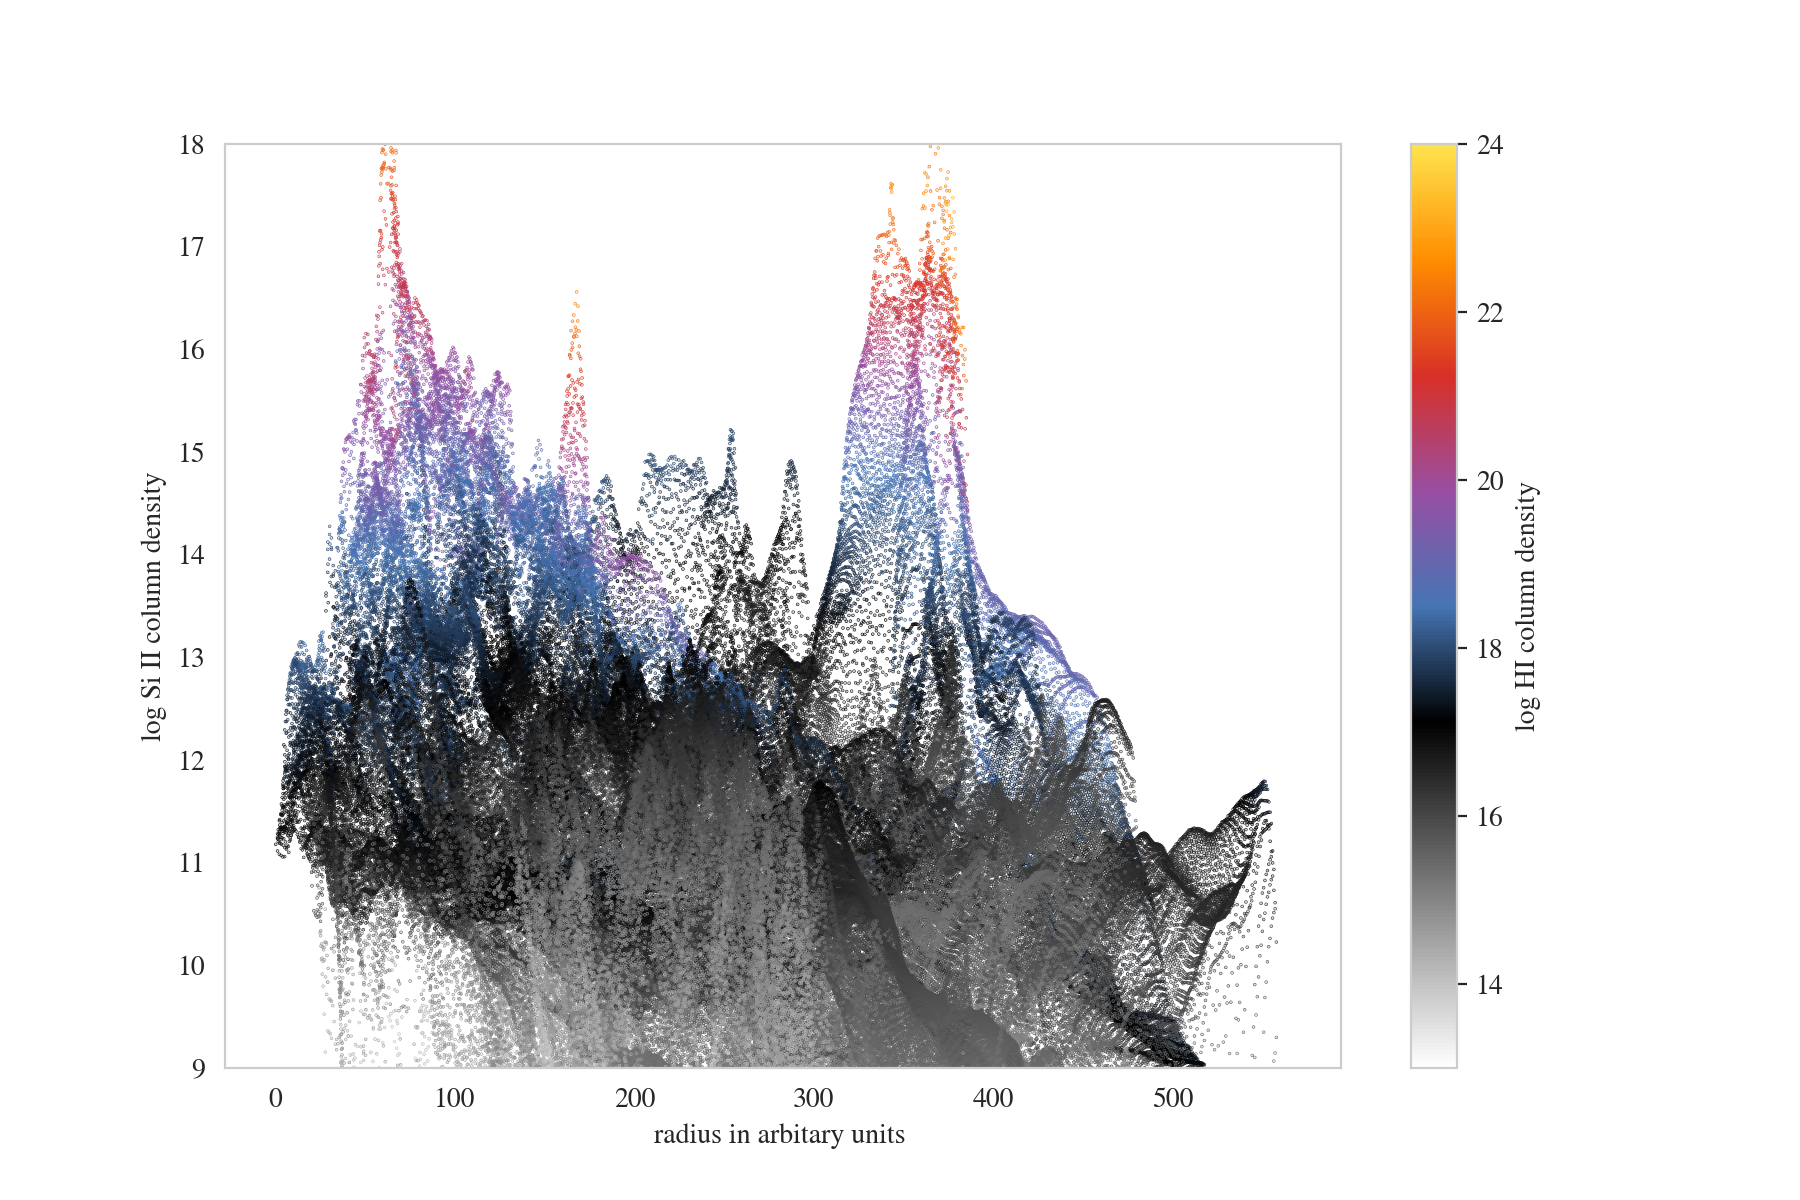

In [63]:
fig, ax = plt.subplots(figsize=(9,6))
sc = ax.scatter(radii, si2_forced, c=hi_forced, cmap=h1_color_map,vmin=13,vmax=24,s=0.05)
ax.set_ylim(9,18)
ax.set_xlabel('radius in arbitary units ')
ax.set_ylabel('log Si II column density')
cb = fig.colorbar(sc)
cb.set_label('log HI column density')

In [135]:
resolution = (1048,1048)
ion = 'H_p0_number_density'
hicoln = []
for axis in ('x','y','z'):
    dph_natural = yt.ProjectionPlot(natural_ds,axis,('gas',ion), center=natural_c, \
                            width=(width,"kpc"), data_source=natural_box)
    frb = dph_natural.data_source.to_frb((width,'kpc'), resolution)
    hi_natural = np.array(np.log10(frb[ion]))
    hicoln.append(hi_natural)
hicoln_new = np.concatenate((hicoln[0], hicoln[1], hicoln[2]), axis=None)
hicoln_new[hicoln_new == -np.inf] = 1

ion = 'Si_p1_number_density'
si2coln = []
for axis in ('x','y','z'):
    dph_natural = yt.ProjectionPlot(natural_ds,axis,('gas',ion), center=natural_c, \
                            width=(width,"kpc"), data_source=natural_box)
    frb = dph_natural.data_source.to_frb((width,'kpc'), resolution)
    si2_natural = np.array(np.log10(frb[ion]))
    si2coln.append(si2_natural.ravel())
si2coln_new = np.concatenate((si2coln[0], si2coln[1], si2coln[2]), axis=None)
si2coln_newsi2coln_new[si2coln_new == -np.inf] = 1


radii = np.zeros(resolution)
indices = np.indices(resolution)
for x in range(0, 1048):
    for y in range(0, 1048):
        radii[x,y] = np.sqrt((524-x)**2 + (524-y)**2)

big_radii = np.concatenate((radii, radii, radii), axis=None)

yt : [INFO     ] 2018-09-21 08:10:38,077 Projection completed
yt : [INFO     ] 2018-09-21 08:10:38,078 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-09-21 08:10:38,079 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-09-21 08:10:38,080 xlim = 0.488119 0.490119
yt : [INFO     ] 2018-09-21 08:10:38,081 ylim = 0.501099 0.503099
yt : [INFO     ] 2018-09-21 08:10:38,082 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800
yt : [INFO     ] 2018-09-21 08:10:38,245 Making a fixed resolution buffer of (H_p0_number_density) 1048 by 1048
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-09-21 08:10:38,471 Projection completed
yt : [INFO     ] 2018-09-21 08:10:38,472 xlim = 0.501099 0.503099
yt : [INFO     ] 2018-09-21 08:10:38,472 ylim = 0.493091 0.495091
yt : [INFO     ] 2018-09-21 08:10:38,473 xlim = 

<IPython.core.display.Javascript object>


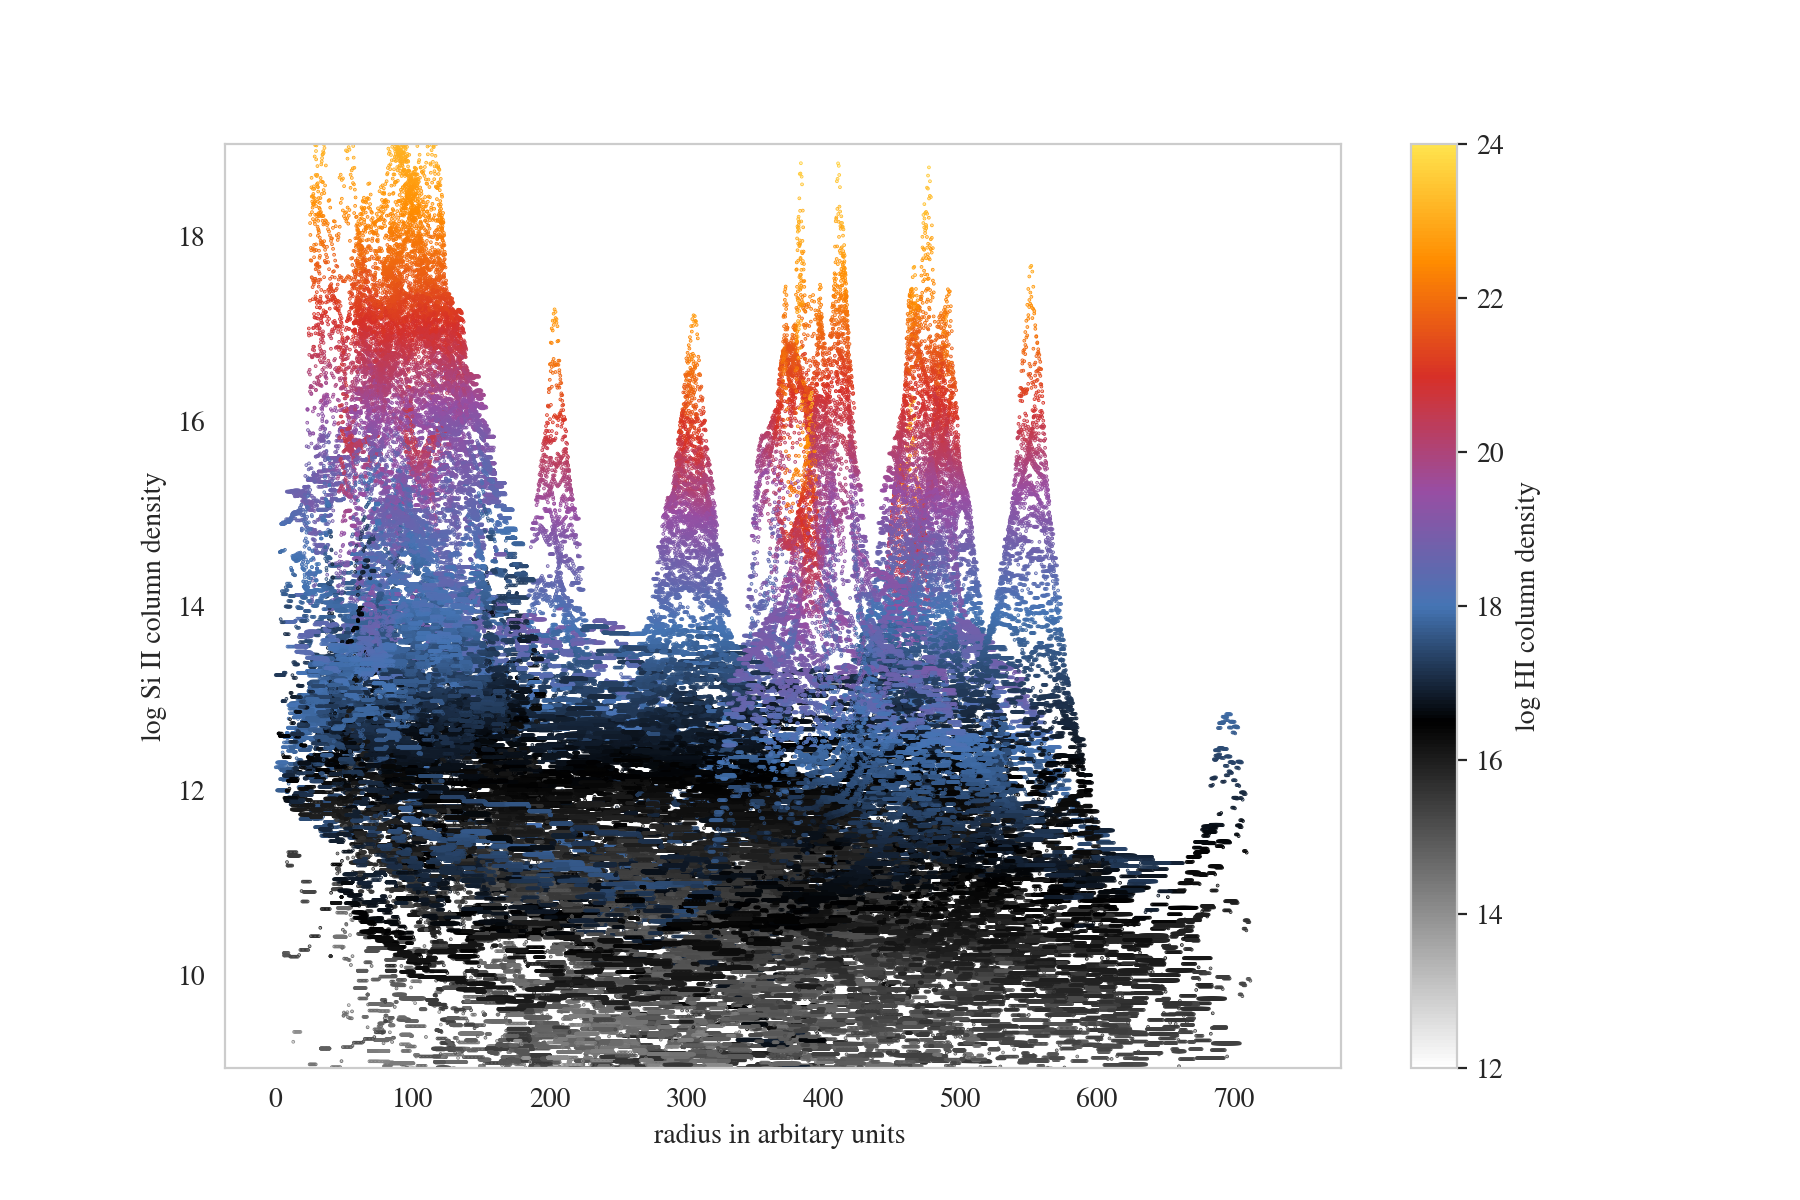

In [136]:
fig, ax = plt.subplots(figsize=(9,6))
sc = ax.scatter(big_radii, si2coln_new, c=hicoln_new, cmap=h1_color_map,vmin=12,vmax=24,s=0.1)
ax.set_ylim(9,19)
ax.set_xlabel('radius in arbitary units ')
ax.set_ylabel('log Si II column density')
cb = fig.colorbar(sc)
cb.set_label('log HI column density')


In [100]:

hi_colors =  sns.blend_palette(("white", "#ababab", "#565656", "black",
                                  "#4575b4", "#984ea3", "#d73027",
                                  "darkorange", "#ffe34d"), n_colors=26)
new_hi_color_key = {b'free': to_hex(hi_colors[0]),
                        b'free1': to_hex(hi_colors[1]),
                        b'free2': to_hex(hi_colors[2]),
                        b'free3': to_hex(hi_colors[3]),
                        # purple
                        b'poor': to_hex(hi_colors[4]),
                        b'poor1': to_hex(hi_colors[5]),
                        b'poor2': to_hex(hi_colors[6]),
                        b'poor3': to_hex(hi_colors[7]),
                        b'low': to_hex(hi_colors[8]),  # blue
                        b'low1': to_hex(hi_colors[9]),
                        b'low2': to_hex(hi_colors[10]),
                        b'low3': to_hex(hi_colors[11]),
                        # green
                        b'solar': to_hex(hi_colors[12]),
                        b'solar1': to_hex(hi_colors[13]),
                        b'solar2': to_hex(hi_colors[14]),
                        b'solar3': to_hex(hi_colors[15]),
                        # yellow
                        b'high': to_hex(hi_colors[16]),
                        b'high1': to_hex(hi_colors[17]),
                        b'high2': to_hex(hi_colors[18]),
                        b'high3': to_hex(hi_colors[19]),
                        # orange
                        b'high4': to_hex(hi_colors[20]),
                        b'moar': to_hex(hi_colors[21]),
                        b'moar1': to_hex(hi_colors[22]),
                        b'moar2': to_hex(hi_colors[23]),
                        b'moar3': to_hex(hi_colors[24]),
                        b'moar4': to_hex(hi_colors[25])
                        }

hi_labels = new_hi_color_key.keys()

def new_categorize_by_hi(hi):
    """ define the temp category strings"""
    hi_vals = np.linspace(start=12,stop=24, num=26)
    # make the highest value really high
    hi_vals[25] = 50. * hi_vals[25]
    phase = np.chararray(np.size(hi), 6)
    # need to do this by iterating over keys insteard of hard coding indices
    phase[hi < hi_vals[25]] = b'moar4'
    phase[hi < hi_vals[24]] = b'moar3'
    phase[hi < hi_vals[23]] = b'moar2'
    phase[hi < hi_vals[22]] = b'moar1'
    phase[hi < hi_vals[21]] = b'moar'
    phase[hi < hi_vals[20]] = b'high4'
    phase[hi < hi_vals[19]] = b'high3'
    phase[hi < hi_vals[18]] = b'high2'
    phase[hi < hi_vals[17]] = b'high1'
    phase[hi < hi_vals[16]] = b'high'
    phase[hi < hi_vals[15]] = b'solar3'
    phase[hi < hi_vals[14]] = b'solar2'
    phase[hi < hi_vals[13]] = b'solar1'
    phase[hi < hi_vals[12]] = b'solar'
    phase[hi < hi_vals[11]] = b'low3'
    phase[hi < hi_vals[10]] = b'low2'
    phase[hi < hi_vals[9]] = b'low1'
    phase[hi < hi_vals[8]] = b'low'
    phase[hi < hi_vals[7]] = b'poor3'
    phase[hi < hi_vals[6]] = b'poor2'
    phase[hi < hi_vals[5]] = b'poor1'
    phase[hi < hi_vals[4]] = b'poor'
    phase[hi < hi_vals[3]] = b'free3'
    phase[hi < hi_vals[2]] = b'free2'
    phase[hi < hi_vals[1]] = b'free1'
    phase[hi < hi_vals[0]] = b'free'
    print(phase)
    return phase


In [101]:
hi_cat = new_categorize_by_hi(hi_forced.ravel())
data_frame = pd.DataFrame({'hi':hi_cat, 'si2':si2_forced.ravel(), 'radii':radii.ravel()})
data_frame.hi = data_frame.hi.astype('category')

cvs = dshader.Canvas(plot_width=600, plot_height=600,
                     y_range=(9, 19),
                     x_range=(0,550))
agg = cvs.points(data_frame, 'radii', 'si2', dshader.count_cat('hi'))
color_key = new_hi_color_key ## actually HI
img = tf.shade(agg, color_key=color_key, how='linear',min_alpha=255)
img

[b'poor1' b'poor1' b'poor1' ... b'free' b'free' b'free']


[b'poor1' b'poor1' b'poor1' ... b'free' b'free' b'free']


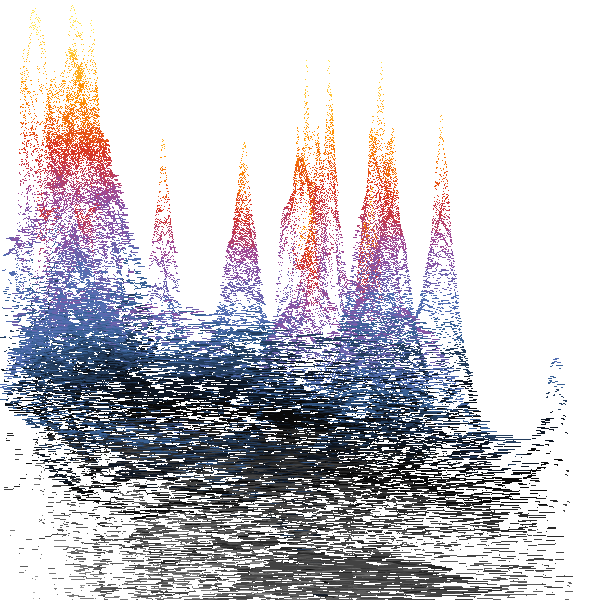

In [140]:
hi_cat = new_categorize_by_hi(hicoln_new.ravel())
data_frame = pd.DataFrame({'hi':hi_cat, 'si2':si2coln_new.ravel(), 'radii':big_radii.ravel()})
data_frame.hi = data_frame.hi.astype('category')

cvs = dshader.Canvas(plot_width=600, plot_height=600,
                     y_range=(8, 20),
                     x_range=(0,750))
agg = cvs.points(data_frame, 'radii', 'si2', dshader.count_cat('hi'))
color_key = new_hi_color_key ## actually HI
img = tf.shade(agg, color_key=color_key, how='linear',min_alpha=255)
img

In [144]:
    x_min, x_max = 0, 65


In [145]:
x_max

65